In [1]:
import torch
import torchvision
from torchvision import transforms

import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## load the trained model

In [2]:
from Architecture.UNet_norm import UNet

model= UNet(in_channels=3, out_channels=31).to(device).float()


model.load_state_dict(torch.load('../Models/best_UNet_norm_retrain.pth', map_location=device))
model.eval() 

UNet(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (spacial_enc1): SpatialAttention(
    (conv1): Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1))
    (sigmoid): Sigmoid()
    (batch_norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (spectral_enc1): SpectralAttention(
    (conv1): Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1))
    (sigmoid): Sigmoid()
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (spa

# Please provide the image path below for any regular rgb image!

## The model with take the 3 channel rgb image and reconstruct it to 31 channel HyperSpectral Image

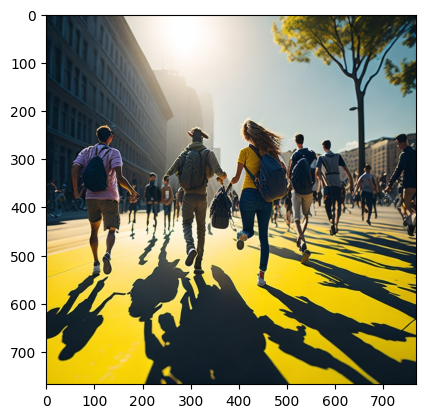

In [23]:
# image_path = 'path/to/your/image.jpg'
image_path = 'C:/Users/Jarvis/Pictures/ai_pic.jpg'
# image_path = "C:/Users/user/Desktop/Research/MST-plus-plus/dataset/Train_RGB/ARAD_1K_0194.jpg"
image = Image.open(image_path)
plt.imshow(image)

In [24]:
image.size

(768, 768)

In [25]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load your image (replace 'path_to_your_image' with the actual file path)

# Define transformations to convert and preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the image to match your model's input size
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Lambda(lambda x: x[:3, :, :])  # Ensure only the first three channels are used
])

# Apply the transformations to the image
input_data = preprocess(image)

# Add an extra dimension to match the batch size (1 image in this case)
input_data = input_data.unsqueeze(0)

# Assuming 'device' is defined (e.g., device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
# and 'model' is your pre-loaded model
input_data = input_data.to(device)

with torch.no_grad():
    output = model(input_data)

print('input data max:', input_data.max())
print('input data min:', input_data.min())
print('output shape:', output.shape)
print('output max:', output.max())
print('output min:', output.min())


input data max: tensor(1., device='cuda:0')
input data min: tensor(0., device='cuda:0')
output shape: torch.Size([1, 31, 512, 512])
output max: tensor(1., device='cuda:0')
output min: tensor(0., device='cuda:0')


In [27]:
output

tensor([[[[2.8445e-02, 2.9153e-02, 2.8983e-02,  ..., 1.4558e-02,
           1.4305e-02, 1.4507e-02],
          [2.7534e-02, 2.7931e-02, 2.9428e-02,  ..., 1.4226e-02,
           1.3905e-02, 1.3754e-02],
          [2.9453e-02, 2.9772e-02, 2.5193e-02,  ..., 1.5189e-02,
           1.3206e-02, 1.2782e-02],
          ...,
          [1.1627e-02, 1.6017e-02, 0.0000e+00,  ..., 1.8066e-02,
           1.9132e-02, 1.8926e-02],
          [7.4882e-03, 1.6806e-02, 0.0000e+00,  ..., 2.0153e-02,
           1.4967e-02, 1.1055e-02],
          [0.0000e+00, 1.6132e-02, 0.0000e+00,  ..., 1.7965e-02,
           1.2094e-02, 0.0000e+00]],

         [[3.4364e-02, 3.5397e-02, 3.7172e-02,  ..., 1.9205e-02,
           1.8730e-02, 1.8992e-02],
          [3.3490e-02, 3.4265e-02, 3.8318e-02,  ..., 1.9110e-02,
           1.8330e-02, 1.8747e-02],
          [3.7226e-02, 3.7693e-02, 3.3323e-02,  ..., 2.0474e-02,
           1.8188e-02, 1.7588e-02],
          ...,
          [4.2951e-03, 0.0000e+00, 0.0000e+00,  ..., 2.6995

## visualizing the output

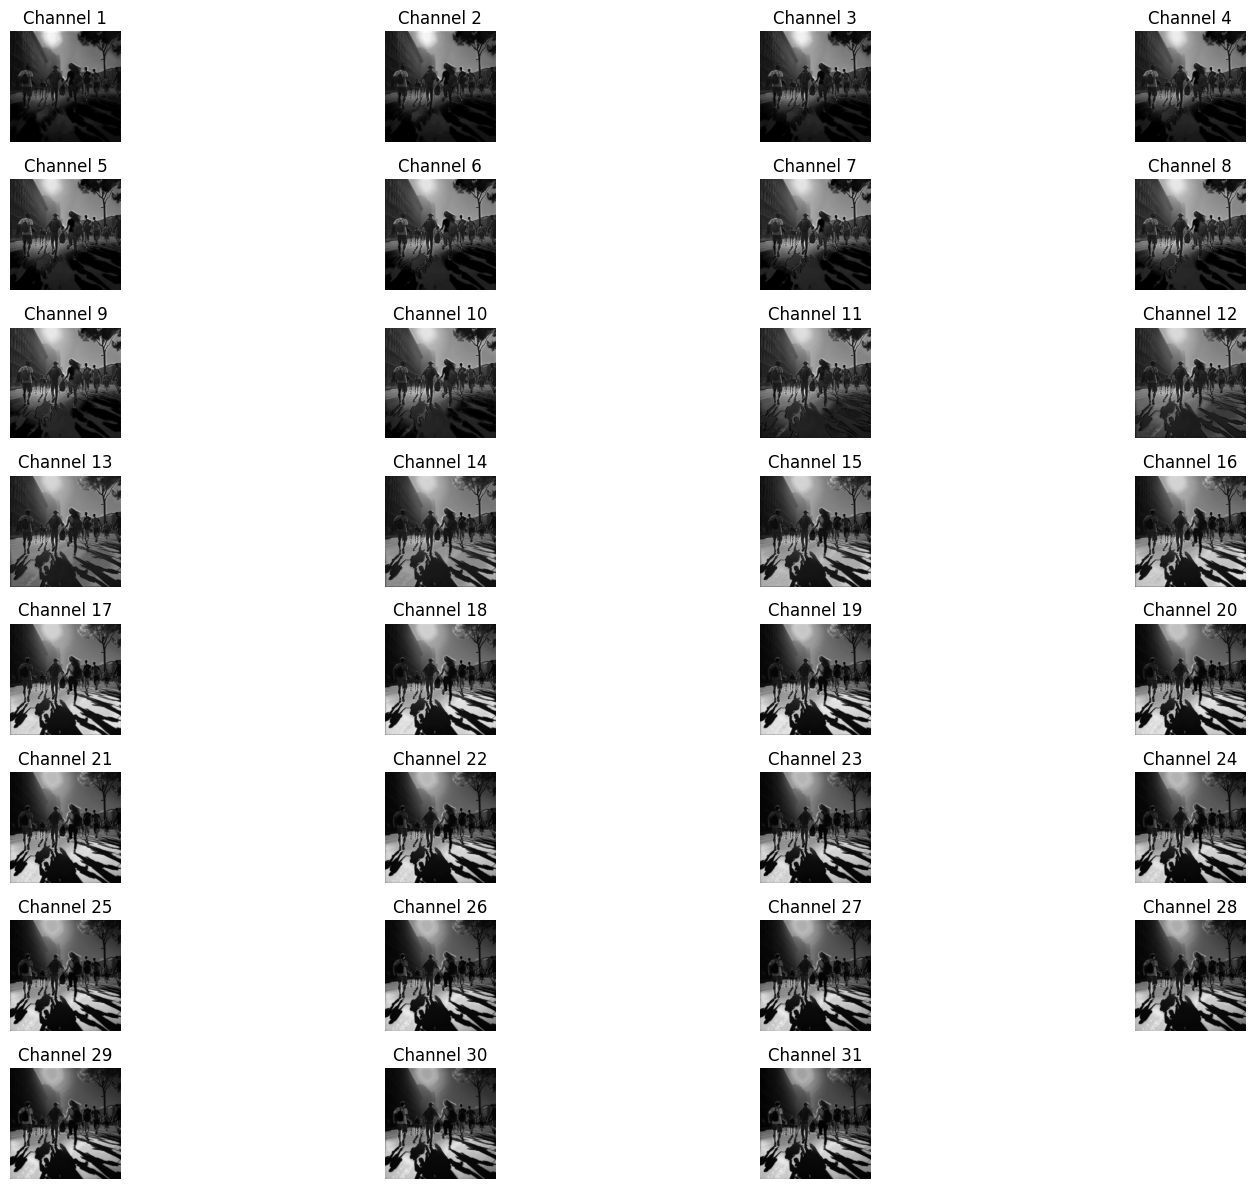

In [28]:
import matplotlib.pyplot as plt

# Assuming 'output' is the result from your model and has shape [1, 31, 482, 512]
# Remove the batch dimension if it exists
if len(output.shape) > 3:
    output = output.squeeze(0)

num_channels = output.shape[0]
num_rows = 8  # You can adjust this based on your preference
num_cols = (num_channels + num_rows - 1) // num_rows  # Calculate the number of columns

plt.figure(figsize=(16, 12))  # Adjust the figure size as needed

for i in range(num_channels):
    plt.subplot(num_rows, num_cols, i + 1)
    channel_data = output[i].cpu().numpy()  # Convert the channel data to a NumPy array
    plt.imshow(channel_data, cmap='gray')  # Display the image in grayscale
    plt.title(f'Channel {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## bigger visulaization of all 31 channels.

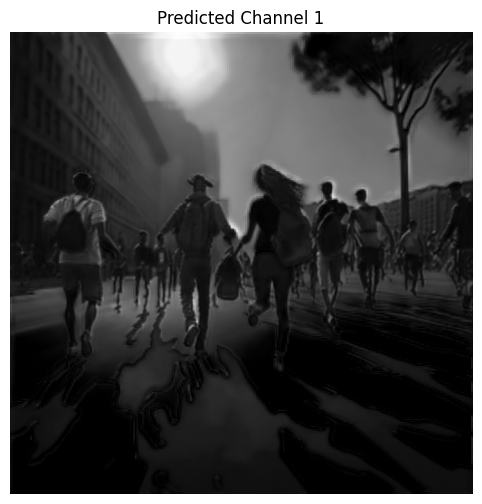

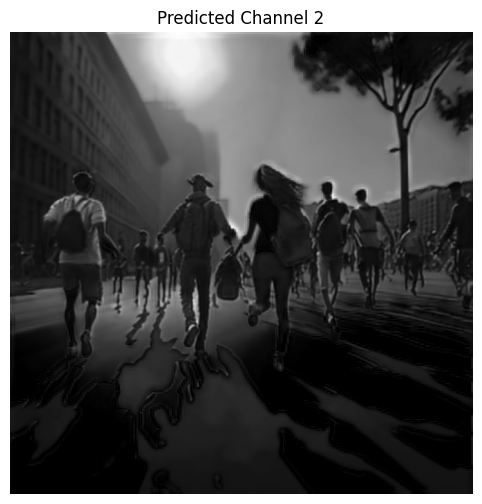

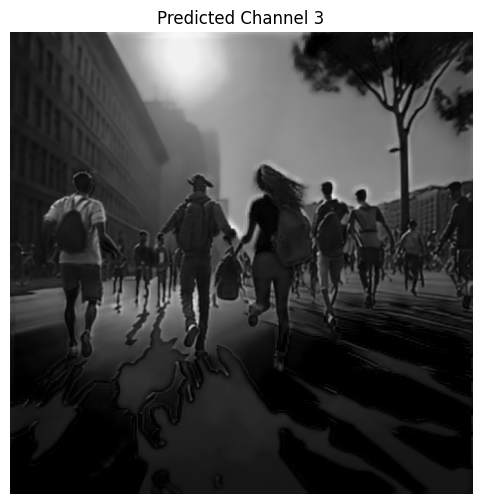

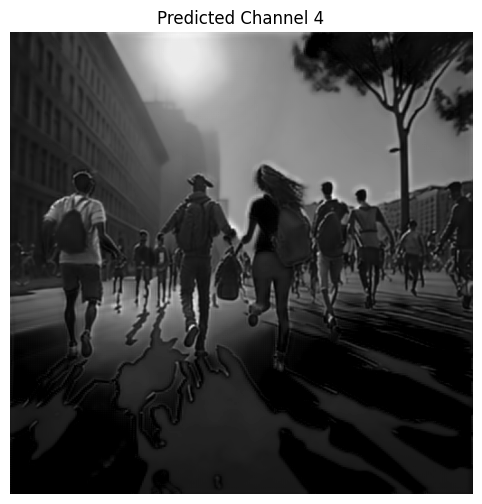

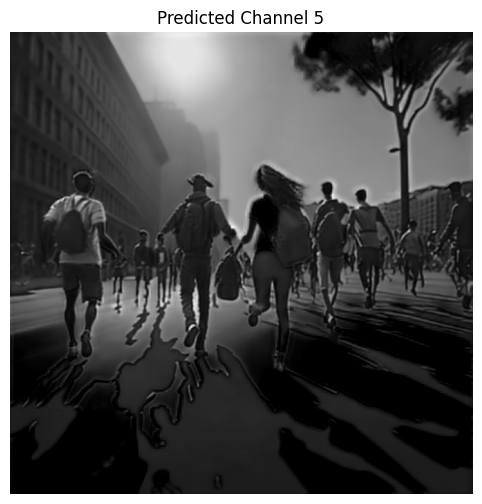

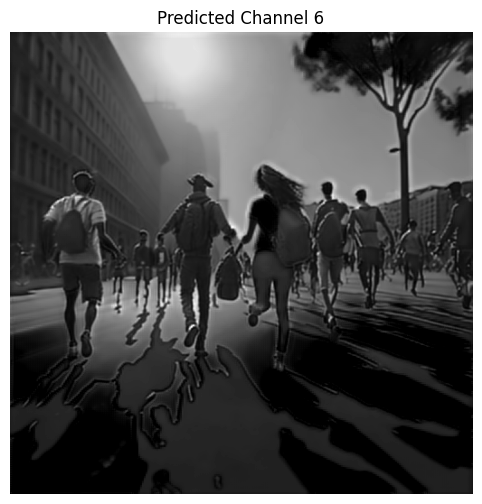

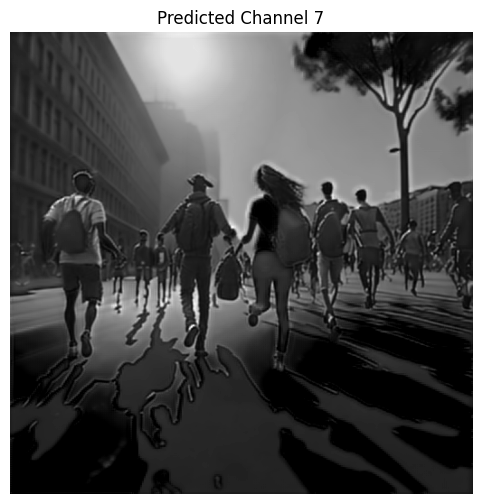

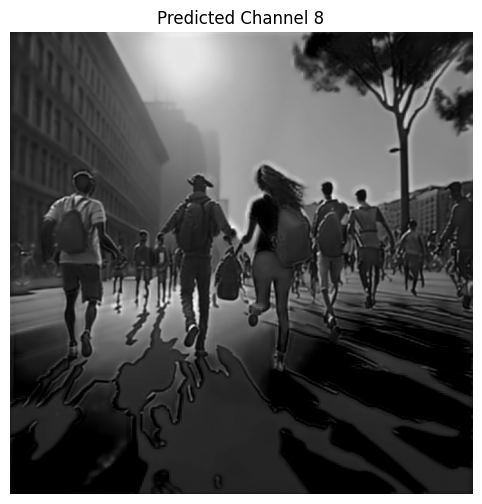

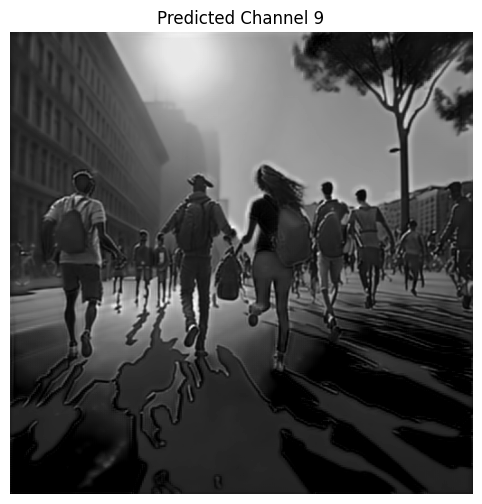

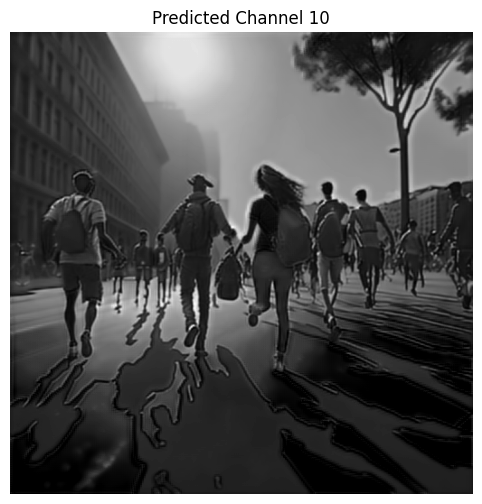

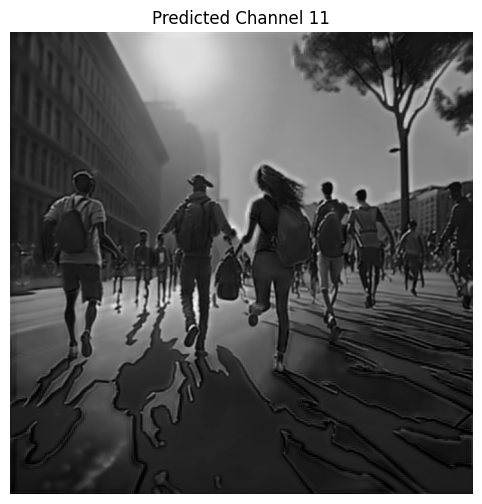

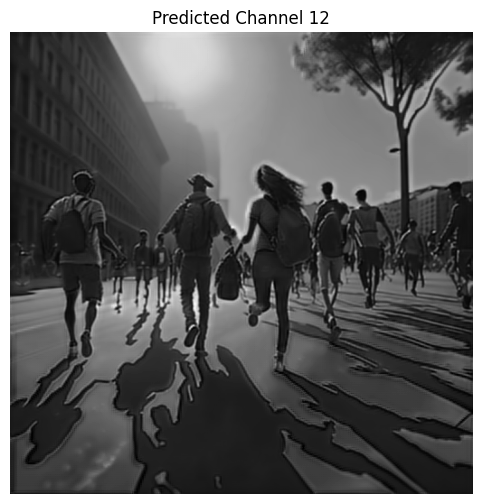

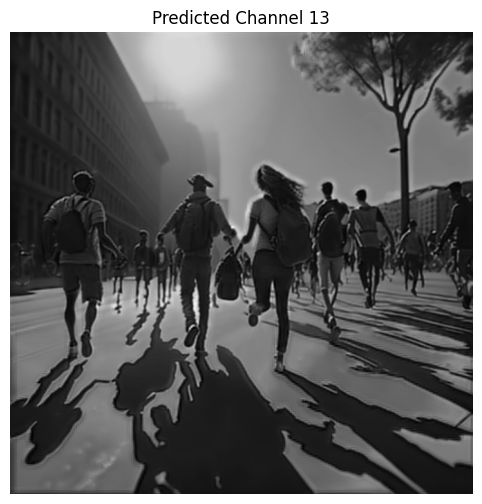

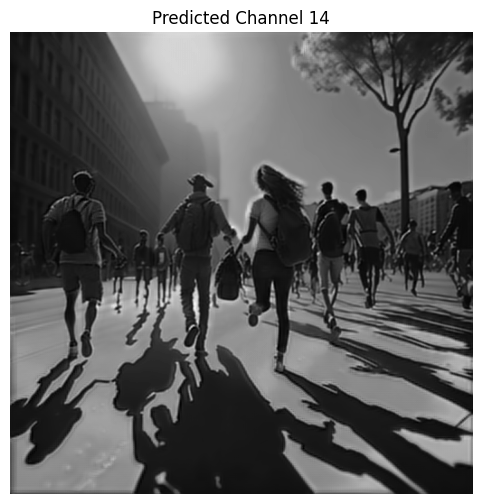

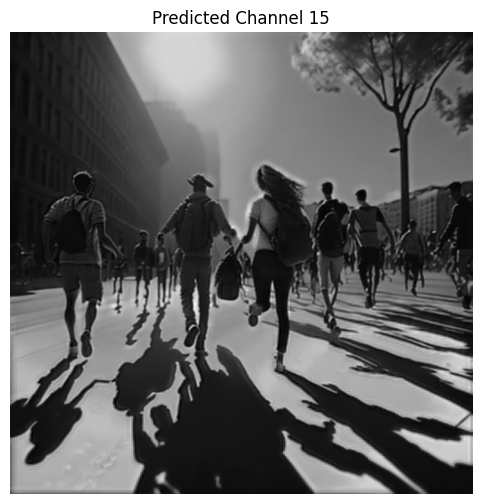

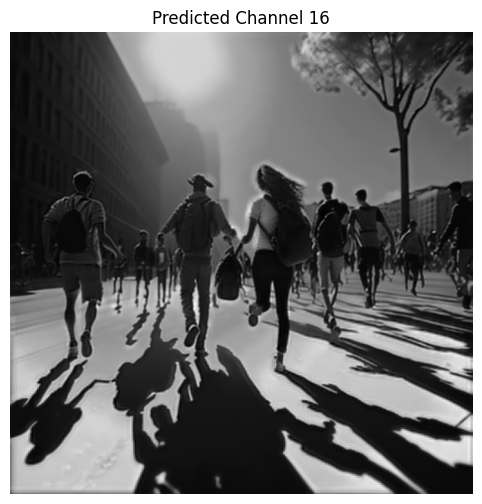

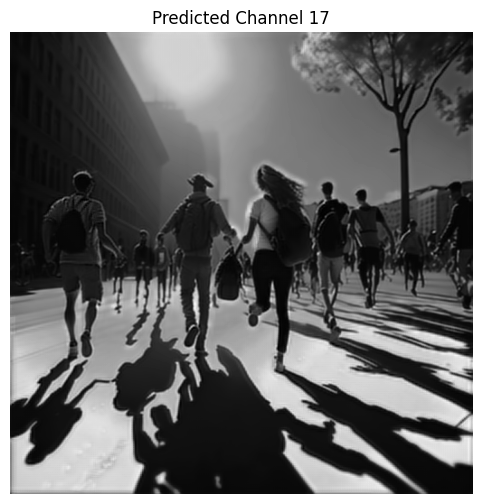

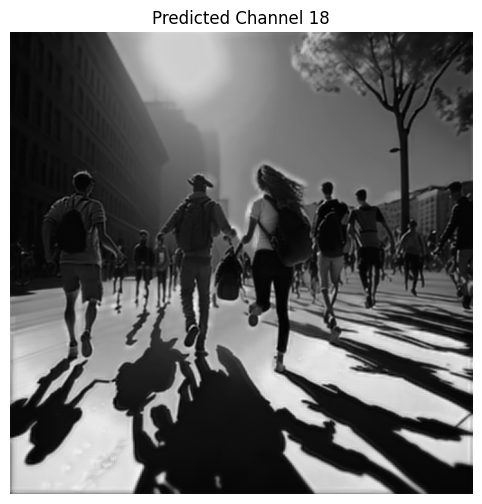

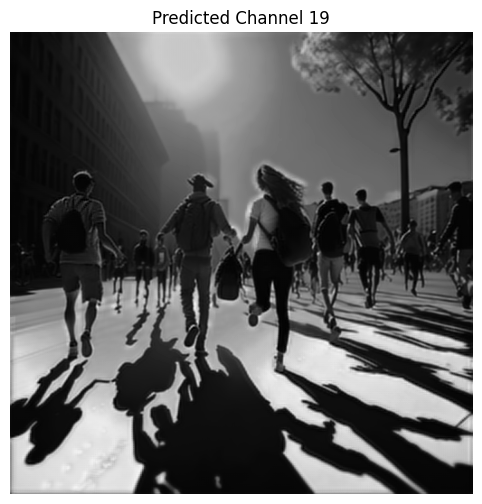

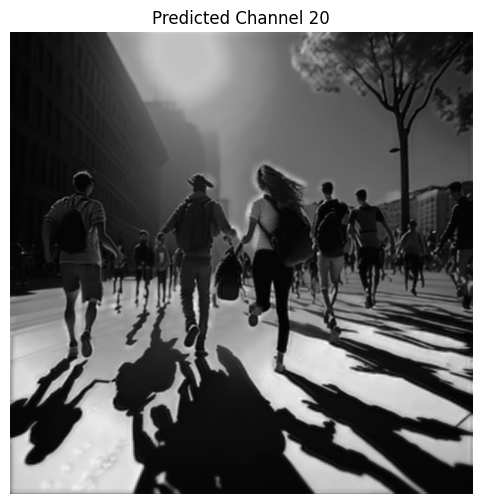

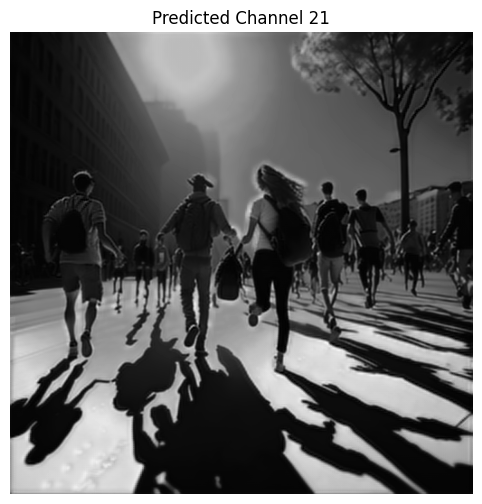

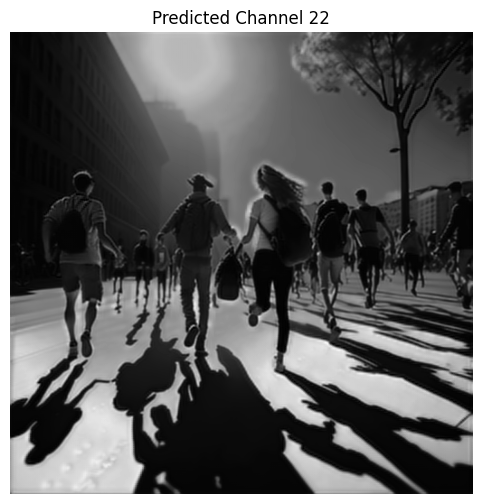

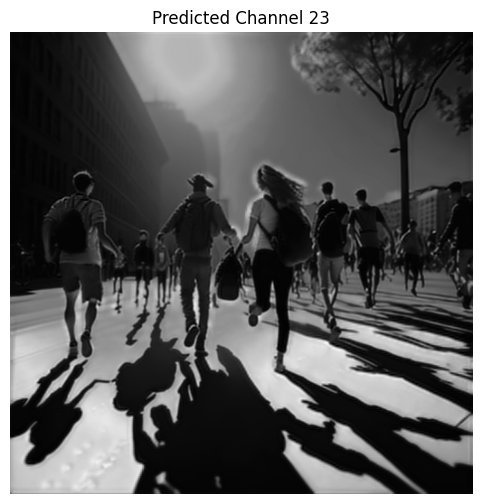

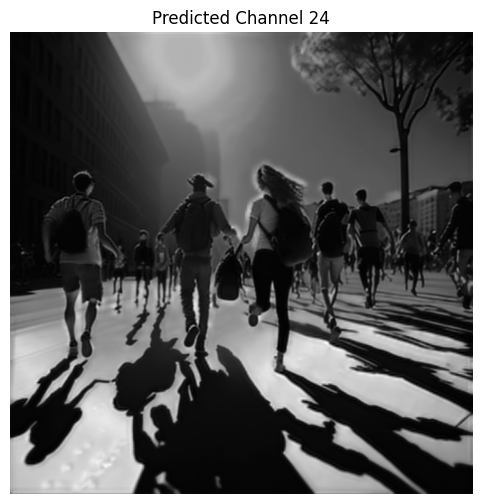

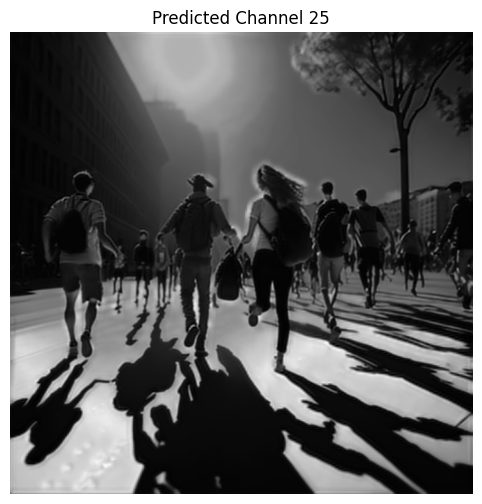

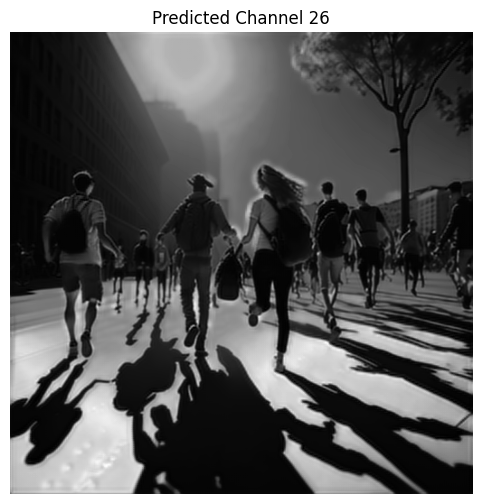

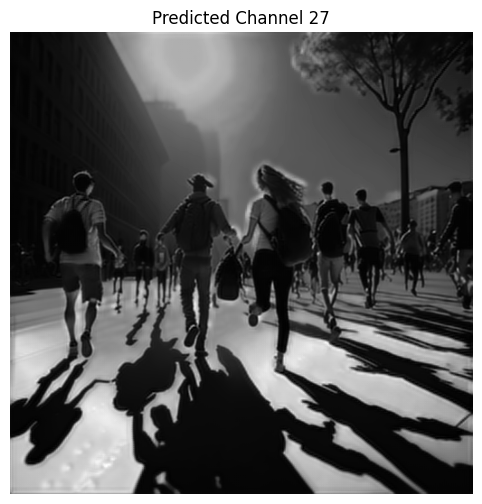

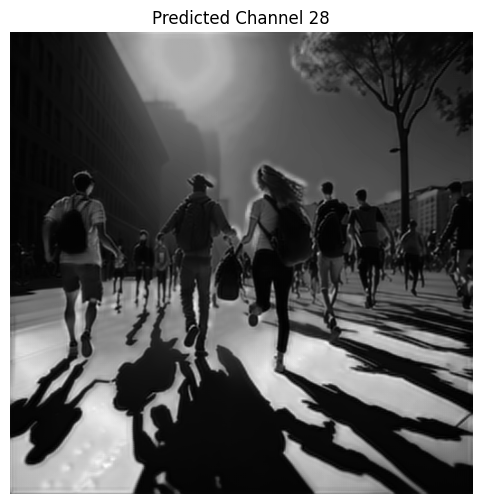

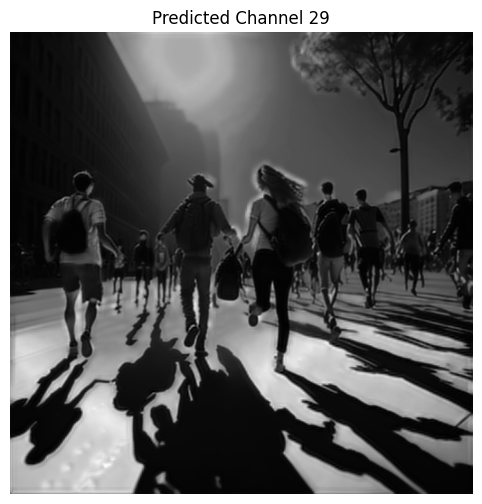

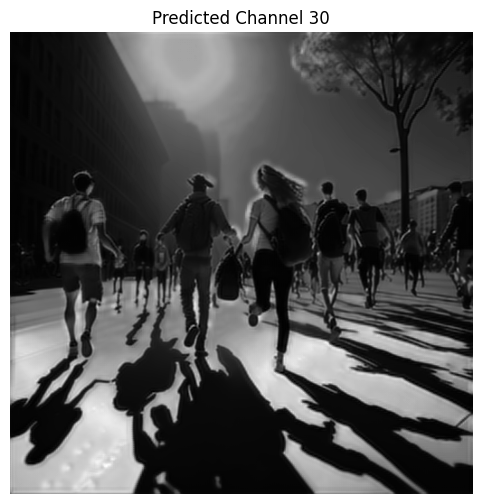

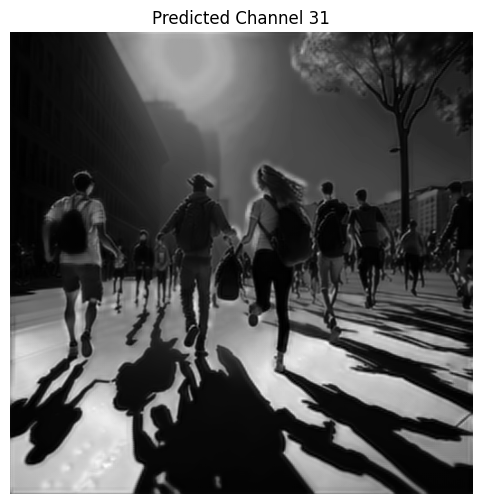

In [29]:
import matplotlib.pyplot as plt

# Remove the batch dimension if it exists in the output tensor
if len(output.shape) > 3:
    output = output.squeeze(0)

num_channels = output.shape[0]

# Loop through each channel and create subplots for predicted and ground truth
for i in range(num_channels):
    plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

    # Display predicted image
    plt.subplot(1, 1, 1)  # 1 row, 2 columns, first subplot
    channel_data_pred = output[i].cpu().numpy()  # Convert to NumPy array
    plt.imshow(channel_data_pred, cmap='gray')  # Display in grayscale
    plt.title(f'Predicted Channel {i + 1}')
    plt.axis('off')
    plt.show()
